<a href="https://colab.research.google.com/github/yesojeda/Noob-git/blob/master/Tp_final_estad%C3%ADstica__UDA_Yesica_Ojeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP Final UDA


In [ ]:
install.packages ("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
library (forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)

ERROR: ignored

Ingreso los resultados de cada mes
son n° de prueba porque no sé qué es resultado ordinario= Ingreso-Egreso. Mi serie de tiempo es Resordinario.ts y el vector de datos es C o Resordinario. Los valores seleccionados aún no son iguales a los que toman los compañeros

In [ ]:
Resordinario=c(968772,	-59538,	899658,	-1607991,	47962,	448286,	128220, 224724,	2183194,	1451961,	2303783,	-8837850,	2308163,	1178093,	877074,	-945512,	322738,	4220580,
              	1226564,	-672814,	3694450,	994429,	1845367,	-3600777,	4242256,	524732,	5039520, 3576723,	1554726,	6368295,
                -5337533,	-1498576,	2349353,	2789216,	1039623,	-4566671,	-5817913,	2738370,	7057589,	6501760,	6784486,	1190704,
                2493362, 13314451,	13999099,	1794991,	4397498, -1902371, 23696883,	7922174,	8298826, -3717444, -10809350, 585855,
                5376851, 17806612, 19900190, -1107242, 2965629, -15576313, 37439525, 12511929,	12219757,	-1856509, -13803050, 1030010)
Resordinario


In [ ]:
Resordinario.ts = ts(Resordinario, start = c(2015,7), frequency = 12)

Resordinario.ts

Graficar serie de resultados


In [ ]:
plot(Resordinario.ts, ylab=" Serie de tiempo Resordinario", xlab="Tiempo" ,type="l",lwd=2,pch=2,cex=2,col="Green")

Para saber la tendencia y si es estacional o no, descompongo la serie. No sé por qué dice que tiene menos de 2 perídos y si tiene más.

Para el gráfico, la orbservada es la serie de tiempo



In [ ]:
descomposicion<-decompose(Resordinario.ts, type = "additive")
plot(descomposicion, ylab="Descomposicion Resordinario", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Red")


Estimar el modelo SARIMA (arima estacional). Uso este modelo ya que al analizar la descomposición me muestra cierta estacionalidad, para conocer mejor cuáles son los períodos con estacionalidad se debería de hacer un gráf de cajas y bigotes.Además, al estudiar la descomposición se ve que tiene una tendencia a la baja. Hay que incorporar también el análisis de los factores


In [ ]:
fit1=auto.arima(Resordinario.ts,seasonal = T,ic = c("aicc"), stepwise=T, allowdrift = T)
summary(fit1)

Predicción

---




In [ ]:
predict.log1= forecast(fit1,h=12)


predict.log1$mean
predict.log1$lower
predict.log1$upper

In [ ]:
sum(predict.log1$mean)

Otra forma para que ajuste mejor con lo que explica desde min 45 de la clase de consulta. Igualmente, tengo que modificar los valores de entrada porque no me coinciden tanto como a ellos

Mejora de aproximación sin auto arima

In [ ]:
fit=arima (Resordinario.ts,order = c(1,1,1),seasonal = c(0,1,0))

summary(fit)

In [ ]:
predict.log2= forecast(fit,h=12)
forecast(fit,h=12)


In [ ]:
predict.log2$mean
predict.log2$lower
predict.log2$upper

In [ ]:
plot(predict.log2)

In [ ]:
sum(predict.log2$mean)

[1] 94056385

In [ ]:
sum(predict.log2$lower)

sum(predict.log2$upper)

[1] -123864481

[1] 430005338

Analizar los supuestos del modelo

Test de shapiro-Wilks

H0: Es normal vs H1: no es normal

In [ ]:
bptes(Resordinario.ts)

ERROR: ignored

Analisis de la homogeneidad de la varianza


In [ ]:
meses=c("Jul","Ago","Sep","Oct","Nov","Dic","Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic","Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic",
              "Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic",
             "Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic",
             "Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic")
meses

[1] "Jul" "Ago" "Sep" "Oct" "Nov" "Dic" "Jan" "Feb" "Mar" "Apr" "May" "Jun"
[13] "Jul" "Ago" "Sep" "Oct" "Nov" "Dic" "Jan" "Feb" "Mar" "Apr" "May" "Jun"
[25] "Jul" "Ago" "Sep" "Oct" "Nov" "Dic" "Jan" "Feb" "Mar" "Apr" "May" "Jun"
[37] "Jul" "Ago" "Sep" "Oct" "Nov" "Dic" "Jan" "Feb" "Mar" "Apr" "May" "Jun"
[49] "Jul" "Ago" "Sep" "Oct" "Nov" "Dic" "Jan" "Feb" "Mar" "Apr" "May" "Jun"
[61] "Jul" "Ago" "Sep" "Oct" "Nov" "Dic"

Transformar a factor

In [ ]:
meses=as.factor(meses)

In [ ]:
datos=data.frame(Resordinario=Resordinario,meses=meses)
datos

Resordinario,meses
<dbl>,<fct>
968772,Jul
-59538,Ago
899658,Sep
-1607991,Oct
47962,Nov
448286,Dic
128220,Jan
224724,Feb
2183194,Mar


Grafico de cajas y bigotes para el factor

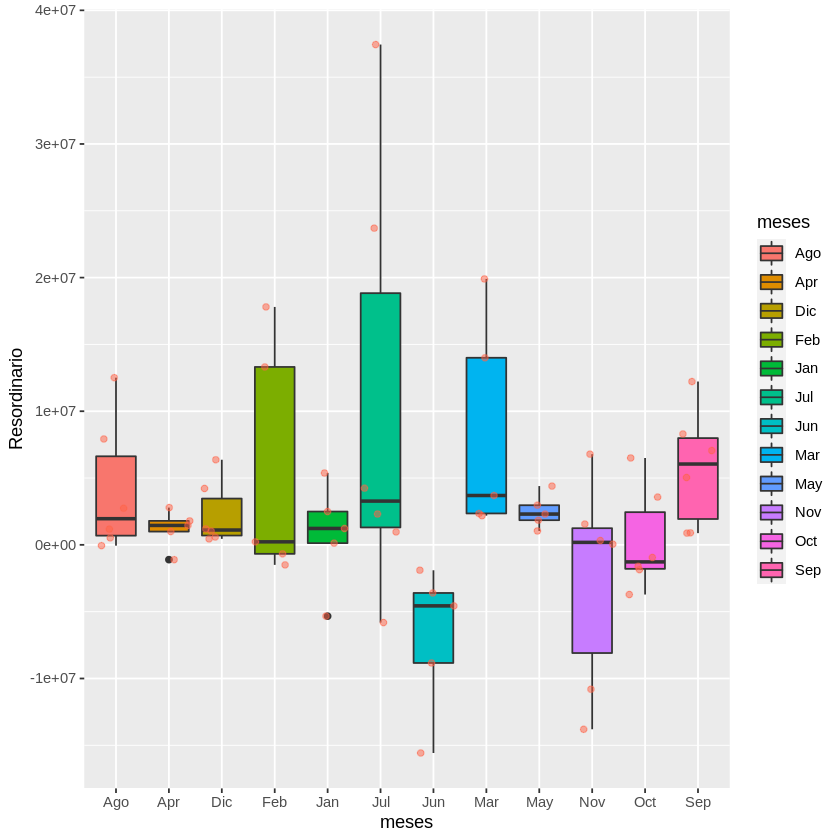

In [ ]:
g = ggplot(datos, aes(y=Resordinario,x=meses))
g= g + geom_boxplot(aes(fill=meses)) 
g=g+geom_jitter(alpha = 0.5, color = "tomato")
g=g+ylab("Resordinario")
g=g+xlab("meses")
g